# Binary Classification of Machine Failures


Welcome to my presentation on the binary classification of machine failure. Our goal is to predict potential failures in machines before they occur, enabling proactive maintenance and reducing downtime. This project utilizes a dataset generated by a deep learning model to train our machine learning algorithms.

### Import necessary libraries

* To address any imbalance in our dataset between the classes (machine operational vs. failure), we use the RandomOverSampler method from the imblearn library
* LabelEncoder converts categorical variables into a machine-readable format.
* StandardScaler standardizes features by removing the mean and scaling to unit variance, crucial for models like SVM and KNN.
* RandomForestClassifier, SVC, LogisticRegression, and KNeighborsClassifier represent a diverse set of approaches, from ensemble methods to linear and instance-based learning

* We split our data into training and testing sets to validate the performance of our models.
* We use cross_val_score for cross-validation, ensuring our model's performance is consistent across different subsets of the data.
* Evaluation metrics like accuracy_score, classification_report, and roc_auc_score help us quantify our model's accuracy, precision, recall, and the ability to distinguish between the classes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Data and see the basic info

#### Features Explanation:

- **ID**: A unique identifier for each observation, essential for tracking and referencing but not used in prediction.
- **Product ID**: Represents the specific product being manufactured, potentially useful for identifying product-related failure patterns.
- **Type**: The type of product (e.g., 'L' or 'M'), which could influence the machine's performance and failure likelihood.
- **Air Temperature [K]**: The ambient temperature during the manufacturing process, a critical factor as extreme temperatures may affect machine components.
- **Process Temperature [K]**: The temperature of the manufacturing process itself, directly impacting machine stress and wear.
- **Rotational Speed [rpm]**: Indicates the speed at which the machine operates, where higher speeds may lead to increased wear or failure chances.
- **Torque [Nm]**: The force applied by the machine, affecting its efficiency and potential for overloading.
- **Tool Wear [min]**: Measures the usage duration of the machine's tools, with higher values indicating greater wear and a higher risk of failure.
- **Machine Failure**: The target variable, indicating whether a failure occurred, which we aim to predict based on the aforementioned features.
- **TWF, HDF, PWF, OSF, RNF**: Specific types of failures (Tool Wear Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Random Failures) providing detailed insights into the failure mechanisms.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/machine_failure/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/machine_failure/test.csv')

In [ ]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Data Inspection

* Imbalanced Data
1. We Examined the distribution of the Machine failure variable
within the training dataset using the value_counts() method in Pandas.
2. The analysis revealed a significant imbalance in the dataset: a large majority of the observations indicate no machine failure (0), while only a small fraction represent actual machine failures (1). This imbalance is critical as it poses challenges for predictive modeling, potentially leading to models that are biased towards predicting the majority class.
* No null Data to clean

In [ ]:
train['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

In [ ]:
train.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Addressing Class Imbalance with Random Oversampling

To mitigate the class imbalance problem in our dataset, we've employed Random Oversampling. This technique involves randomly duplicating instances of the minority class (in this case, `Machine failure` = 1) to increase its representation in the dataset. The goal is to achieve a more balanced distribution between classes, which can significantly improve model performance by reducing bias towards the majority class.


In [ ]:
# Define X (features) and y (target)
X = train.drop(columns=['Machine failure'])
y = train['Machine failure']

# Random Oversampling
oversampler = RandomOverSampler()
X_resample, y_resample = oversampler.fit_resample(X, y)

# Create DataFrame with resampled data
train = pd.DataFrame(X_resample, columns=X.columns)
train['Machine failure'] = y_resample

In [ ]:
train['Machine failure'].value_counts()

0    134281
1    134281
Name: Machine failure, dtype: int64

## Correlation Analysis of Numerical Features

We conducted a correlation analysis on the numerical features of our dataset to understand how these variables relate to each other. The features included in this analysis are `Air temperature [K]`, `Process temperature [K]`, `Rotational speed [rpm]`, `Torque [Nm]`, and `Tool wear [min]`. A heatmap was used to visualize the correlation coefficients between these features.


### Key Insights:
- Air Temperature to Process Temperature (0.83): This high positive correlation suggests that as air temperature increases, process temperature tends to increase as well. This relationship is strong, indicating a close linkage between air and process temperatures.
- Rotational Speed to Torque (-0.74): A strong negative correlation, indicating that as rotational speed increases, torque significantly decreases. This relationship is one of the most notable in our dataset, suggesting a significant inverse relationship between these two features.


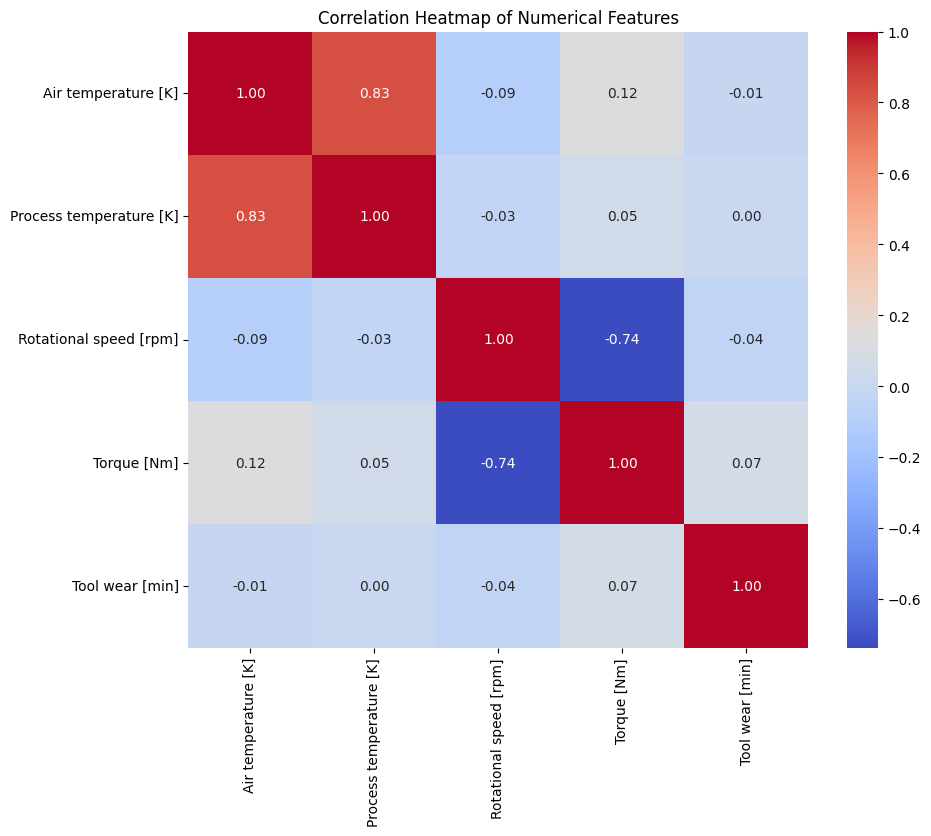

In [ ]:
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Histograms for Numerical Features:

- Generated histograms for each numerical feature in the dataset to visualize their distributions.
- Histograms provide a quick overview of the distribution shape (normal, skewed, bimodal, etc.) for each numerical feature, offering clues about the underlying data distribution and potential preprocessing steps needed, like normalization or transformation.



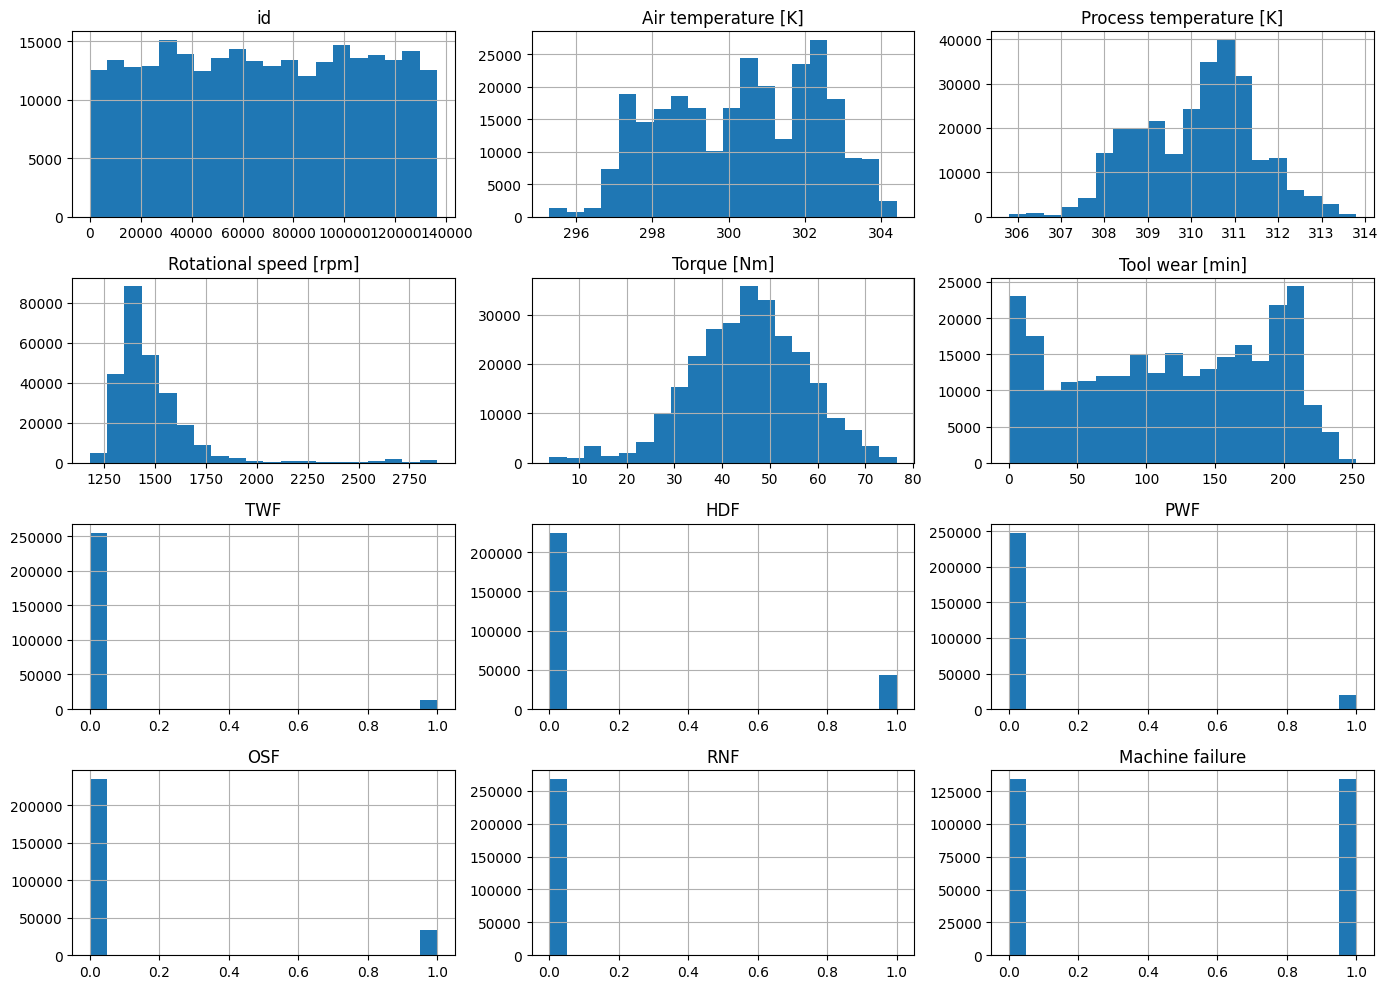

In [ ]:
# Histograms for numerical features
train.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

### Boxplots by Machine Failure:

- Created boxplots for each numerical feature against the `Machine failure` target variable to examine the distribution and identify outliers within each category of the target variable.


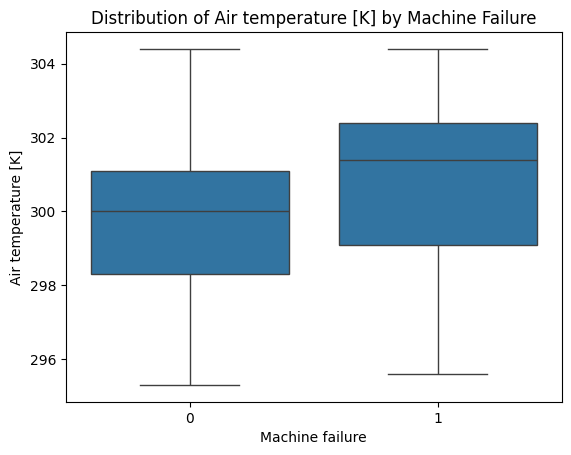

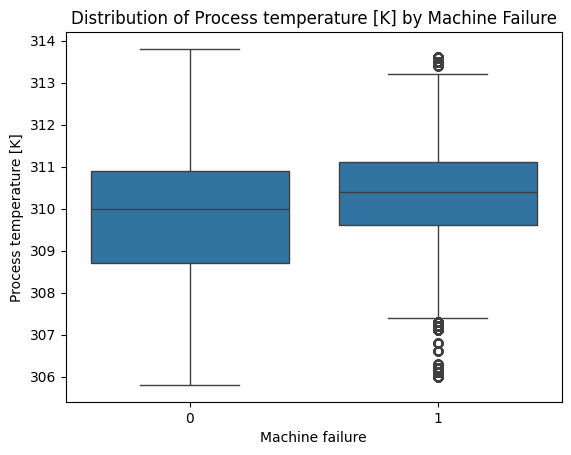

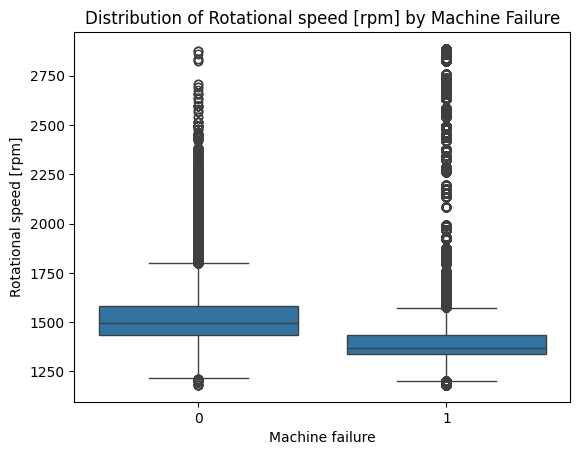

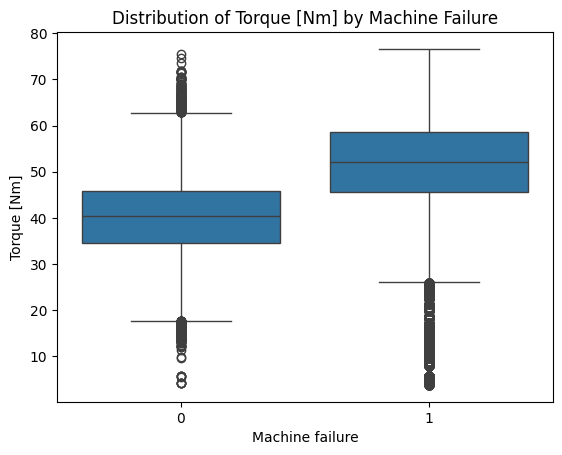

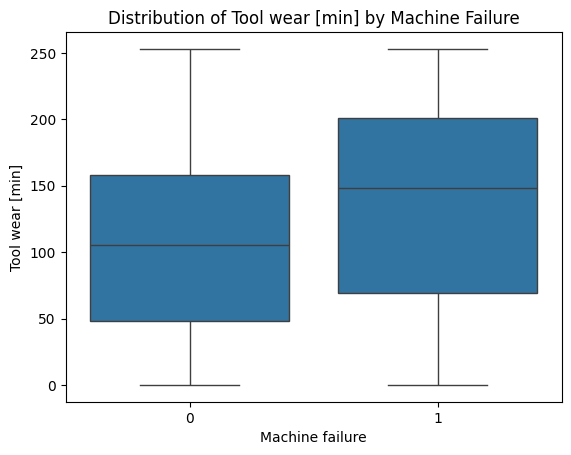

In [ ]:
# Boxplots to check for outliers and distribution across the target variable
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for feature in numerical_features:
    sns.boxplot(x='Machine failure', y=feature, data=train)
    plt.title(f'Distribution of {feature} by Machine Failure')
    plt.show()

## Data Preprocessing

### Encoding Categorical Features:

#### Implemented Step:
- Utilized `LabelEncoder` from `sklearn.preprocessing` to convert the `Type` categorical feature into a numeric format. This transformation is essential for machine learning models that require numerical input.

### Scaling Numerical Features:

#### Implemented Step:
- Applied `StandardScaler` from `sklearn.preprocessing` to normalize the numerical features (`Air temperature [K]`, `Process temperature [K]`, `Rotational speed [rpm]`, `Torque [Nm]`, and `Tool wear [min]`). This ensures that all numerical features contribute equally to the model's prediction.


### Dropping Unnecessary Columns:

#### Implemented Step:
- Removed the `id` and `Product ID` columns from the dataset, as these identifiers are not useful for predicting machine failure.


### Resulting Dataset:

After applying these preprocessing steps, we display the first few rows of the modified dataset to verify the transformations. The `Type` feature is now numeric, numerical features are scaled, and non-informative columns are removed, making the dataset ready for machine learning model training.

In [ ]:
# Instantiate the encoder
label_encoder = LabelEncoder()

# Assuming 'Type' is a categorical feature
train['Type'] = label_encoder.fit_transform(train['Type'])

scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])

train.drop(columns=['id', 'Product ID'], inplace=True)

# Display the first few rows to see the result
train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1,0.122316,-0.382501,0.487326,-0.751036,0.309420,0,0,0,0,0,0
1,2,1.124545,1.492837,1.216551,-1.328657,1.163550,0,0,0,0,0,0
2,1,-0.529132,-1.207650,1.422345,-1.543203,-1.327664,0,0,0,0,0,0
3,1,0.322762,0.592675,0.165215,-0.074393,1.120843,0,0,0,0,0,0
4,2,-1.180581,-0.832582,0.688646,-0.808798,-1.199544,0,0,0,0,0,0


## Model Training Setup

### Preparing Dataset for Training:

#### Steps Implemented:
- Split the dataset into features (`X`) and target (`y`) variables, excluding the `Machine failure` column from the features set to serve as our prediction target.
- Utilized `train_test_split` from `sklearn.model_selection` to divide the dataset into training and validation sets. This separation allows for training models on one subset of the data and validating their performance on an unseen subset, ensuring that our evaluations reflect the model's ability to generalize to new data.

### Model Selection:

- **Diversity**: The selected models represent a mix of algorithmic approaches, from ensemble methods and linear models to instance-based learning, providing a broad spectrum of learning strategies to evaluate on our dataset.
- **Applicability**: Each model has distinct characteristics making it potentially suitable for our machine failure detection task, allowing us to explore different aspects of the data's predictive power.

In [ ]:
X = train.drop(columns=['Machine failure'])
y = train['Machine failure']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}

## Model Evaluation Using Cross-Validation

### Cross-Validation Process:
- For each model in our `models` dictionary, we performed 5-fold cross-validation using `cross_val_score` from `sklearn.model_selection`. This method automatically splits the dataset into five parts, trains the model on four of these parts, and validates on the fifth part, iterating so that each part serves as the validation set once.
- Calculated and printed the mean accuracy score for each model to identify which models perform best on our dataset based on the current preprocessing and feature selection.
- **Model Performance**: The mean accuracy scores provide a quick comparison point between models, highlighting which ones might be more suitable for detecting machine failure in our specific context.
- **Benchmarking**: These initial scores serve as benchmarks for further model tuning and comparison, guiding the selection of models for more in-depth hyperparameter optimization.
- **Model Selection**: This process aids in identifying the most promising models before investing more resources into fine-tuning and optimization.


In [ ]:
cv_scores = {}

for name, model in models.items():
    print("name model : ",name)
    scores = cross_val_score(model, X[:10000], y[:10000], cv=5, scoring='accuracy')
    cv_scores[name] = scores.mean()
    print(cv_scores[name])

name model :  RandomForest
0.9964999999999999
name model :  SVC
0.9949
name model :  LogisticRegression
0.9952000000000002
name model :  KNeighbors
0.9921


## Selecting and Training the Best Model

### Best Model Selection:
- The model with the highest mean cross-validation score was determined to be the best fit for our machine failure detection task. This model, referred to as `best_model`, represents the algorithm most capable of accurately predicting machine failures under the conditions tested.
- After selecting the best model based on cross-validation scores, we proceeded to fit this model on the entire training dataset. This step is vital for leveraging all available data, maximizing the model's learning potential before final evaluation or deployment.

In [ ]:
best_model = max(cv_scores, key=cv_scores.get)
print(f'Best model: {best_model} with mean cross-validation score of {cv_scores[best_model]}')
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
best_model.fit(train.drop(columns=['Machine failure']), train['Machine failure'])

Best model: RandomForest with mean cross-validation score of 0.9964999999999999


RandomForestClassifier()

## Model Performance Evaluation

### Key Insights:
- **Confusion Matrix**: Helps in identifying the model's strengths and weaknesses in predicting each class. For instance, a high number of false negatives might indicate that the model struggles to detect actual machine failures.
- **Classification Report**: Precision and recall are particularly important in the context of machine failure detection, where the cost of false negatives (failing to predict a machine failure) could be significantly higher than false positives.
- **ROC Curve and AUC**: An AUC close to 1 indicates excellent model performance. The ROC curve also helps in choosing an optimal threshold for classification based on the trade-off between true positive and false positive rates.

### Visualization:
- The plotted ROC curve visualizes the trade-off between sensitivity and specificity. The comparison against the 'Random Guess' line (diagonal) provides a visual indication of how much better the model is performing compared to a non-informative classifier.

### Model Performance Summary:
- Based on the calculated AUC and the classification report, we can assess the overall effectiveness of our model in detecting machine failures. High precision and recall for the 'failure' class are particularly desirable, indicating that the model can reliably identify failures without overwhelming operators with false alarms.

In [ ]:
train_predictions = best_model.predict(train.drop(columns=['Machine failure']))
conf_matrix = confusion_matrix(train['Machine failure'], train_predictions)
class_report = classification_report(train['Machine failure'], train_predictions)
roc_auc = roc_auc_score(train['Machine failure'], train_predictions)

In [ ]:
conf_matrix

array([[134246,     35],
       [     0, 134281]])

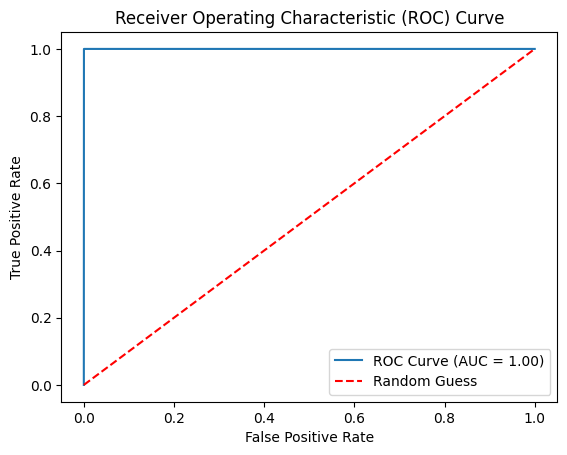

In [ ]:
fpr, tpr, thresholds = roc_curve(train['Machine failure'], train_predictions)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(f'\nClassification Report:\n{class_report}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    134281
           1       1.00      1.00      1.00    134281

    accuracy                           1.00    268562
   macro avg       1.00      1.00      1.00    268562
weighted avg       1.00      1.00      1.00    268562



### Final Result and Conclusion
The confusion matrix provides a detailed breakdown of the model's predictions:

True Negatives (TN): The model correctly predicted the non-failure of machines 134,246 times.
False Positives (FP): The model incorrectly predicted machine failure 35 times when there was no failure.
False Negatives (FN): The model made no errors in predicting failures; it did not miss any actual failures.
True Positives (TP): The model correctly predicted machine failure 134,281 times.
This matrix reveals an almost perfect prediction capability, with a negligible number of false positives and no false negatives.

An AUC score of 1.00 is perfect, indicating that the model has a 100% rate of correctly classifying the binary outcomes (failure vs. non-failure). This score means the model can distinguish between the classes with perfect accuracy.

Precision: The model's precision score of 1.00 for both classes indicates that virtually all the predictions made by the model were correct.
Recall: The recall score of 1.00 for both classes shows that the model successfully identified all actual positives (failures) and negatives (non-failures) correctly.
F1-Score: The F1-score of 1.00, a harmonic mean of precision and recall, suggests perfect balance and accuracy in the model's predictions.

